# **SETUP Libraries for first assignment** 

In [1]:
!pip install --user -U nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import gutenberg
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from string import punctuation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('names')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Vince\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vince\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vince\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Vince\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[n

True

# **1° Assignment: Some Preprocessing tasks**


## **NLTK** 
NLTK is a collection of modules and corpora, released under an open-source license, that allows students to learn and conduct research in NLP.
The most important advantage of using NLTK is that it is entirely self-contained. Not only it provided convenient function and wrappers that can be used as building blocks for common NLP tasks, but it also provides raw and pre-processes versions of standard corpora used in NLP literature and courses.

## **Corpus loading**

A corpus is a large collection of texts, spoken or written, to find out how often specific words or phrases occur and what type of collocation are most
common.
In this case we want to upload a corpus, to do this we load the **GUTENBERG** collection and through gutenberg.raw, to which we give as input the name (or id) of the corpus we want to load, we get the unprocessed corpus. <br>
We store the word list and the entire corpus as a string type using the NLTK methods: `words()` and `raw()`.


In [2]:
corpus = gutenberg.raw(gutenberg.fileids()[1]) # "gutenberg.fileids()[1]" is austen-persuasion.txt, and corpus is a str
words_corpus = gutenberg.words(gutenberg.fileids()[1])
print(words_corpus, "type of words_corpus:", type(words_corpus))


['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...] type of words_corpus: <class 'nltk.corpus.reader.util.StreamBackedCorpusView'>


## **Corpus statistics**

### **Word Frequency**

Word Frequency distribution can be considered as one of the basic statistical analysis that can be done on text data.

In this section we count the total number of words in the corpus, the total number of unique words and a list of the 10 most frequent words. <br>
To be able to count the total number of words and unique words, it is necessary to use the `.N()` and `.B()` methods of the `FreqDist()` class respectively. <br>

```
#OUTPUT
Total number of samples:  98171 
Number of bins or unique samples 6132
```

To show the n most frequent words you can use the most_common (n) function which returns the n most frequent words.



```
  Word  Frequency
0  the       3329
1   to       2808
2  and       2801
3   of       2570
4    a       1595
5   in       1389
6  was       1337
7  her       1204
8  had       1186
9  she       1146
```




In [3]:
fd = nltk.FreqDist()
Punctuation = list(punctuation)
Punctuation.append('."')
for word in words_corpus:
  if word not in Punctuation:
    fd[word.lower()]+=1


print('Total number of samples: ',fd.N(), '\nNumber of bins or unique samples', fd.B())

data_frame=pd.DataFrame(fd.most_common(10),columns=['Word','Frequency'])
display(data_frame)
  

Total number of samples:  84767 
Number of bins or unique samples 5819


,Word,Frequency
0,the,3329
1,to,2808
2,and,2801
3,of,2570
4,a,1595
5,in,1389
6,was,1337
7,her,1204
8,had,1186
9,she,1146


We plot the words in a graph, and can see that most of the words present in the top occuring list are STOPWORDS and the most frequenct word here is *the* and that is obvious

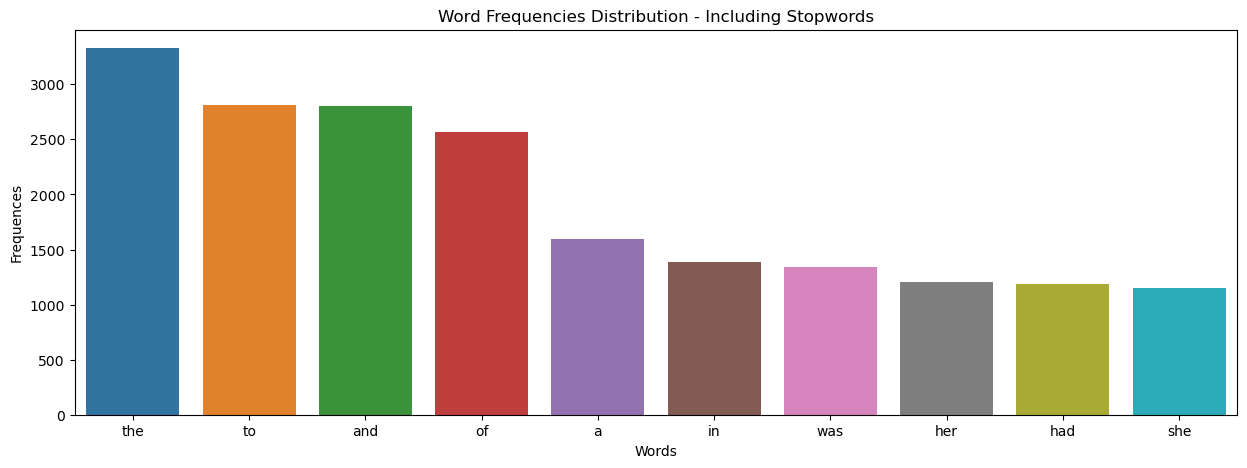

In [4]:
words = [element[0] for element in fd.most_common(10)]
frequences = [element[1] for element in fd.most_common(10)]
plt.figure(figsize=(15,5))
plt.xlabel("Words")
plt.ylabel("Frequences")
plt.title("Word Frequencies Distribution - Including Stopwords")
plot = sns.barplot(x=words,y=frequences)


We can remove the stopwords using the list from nltk package and see the 10 most common words in our corpus

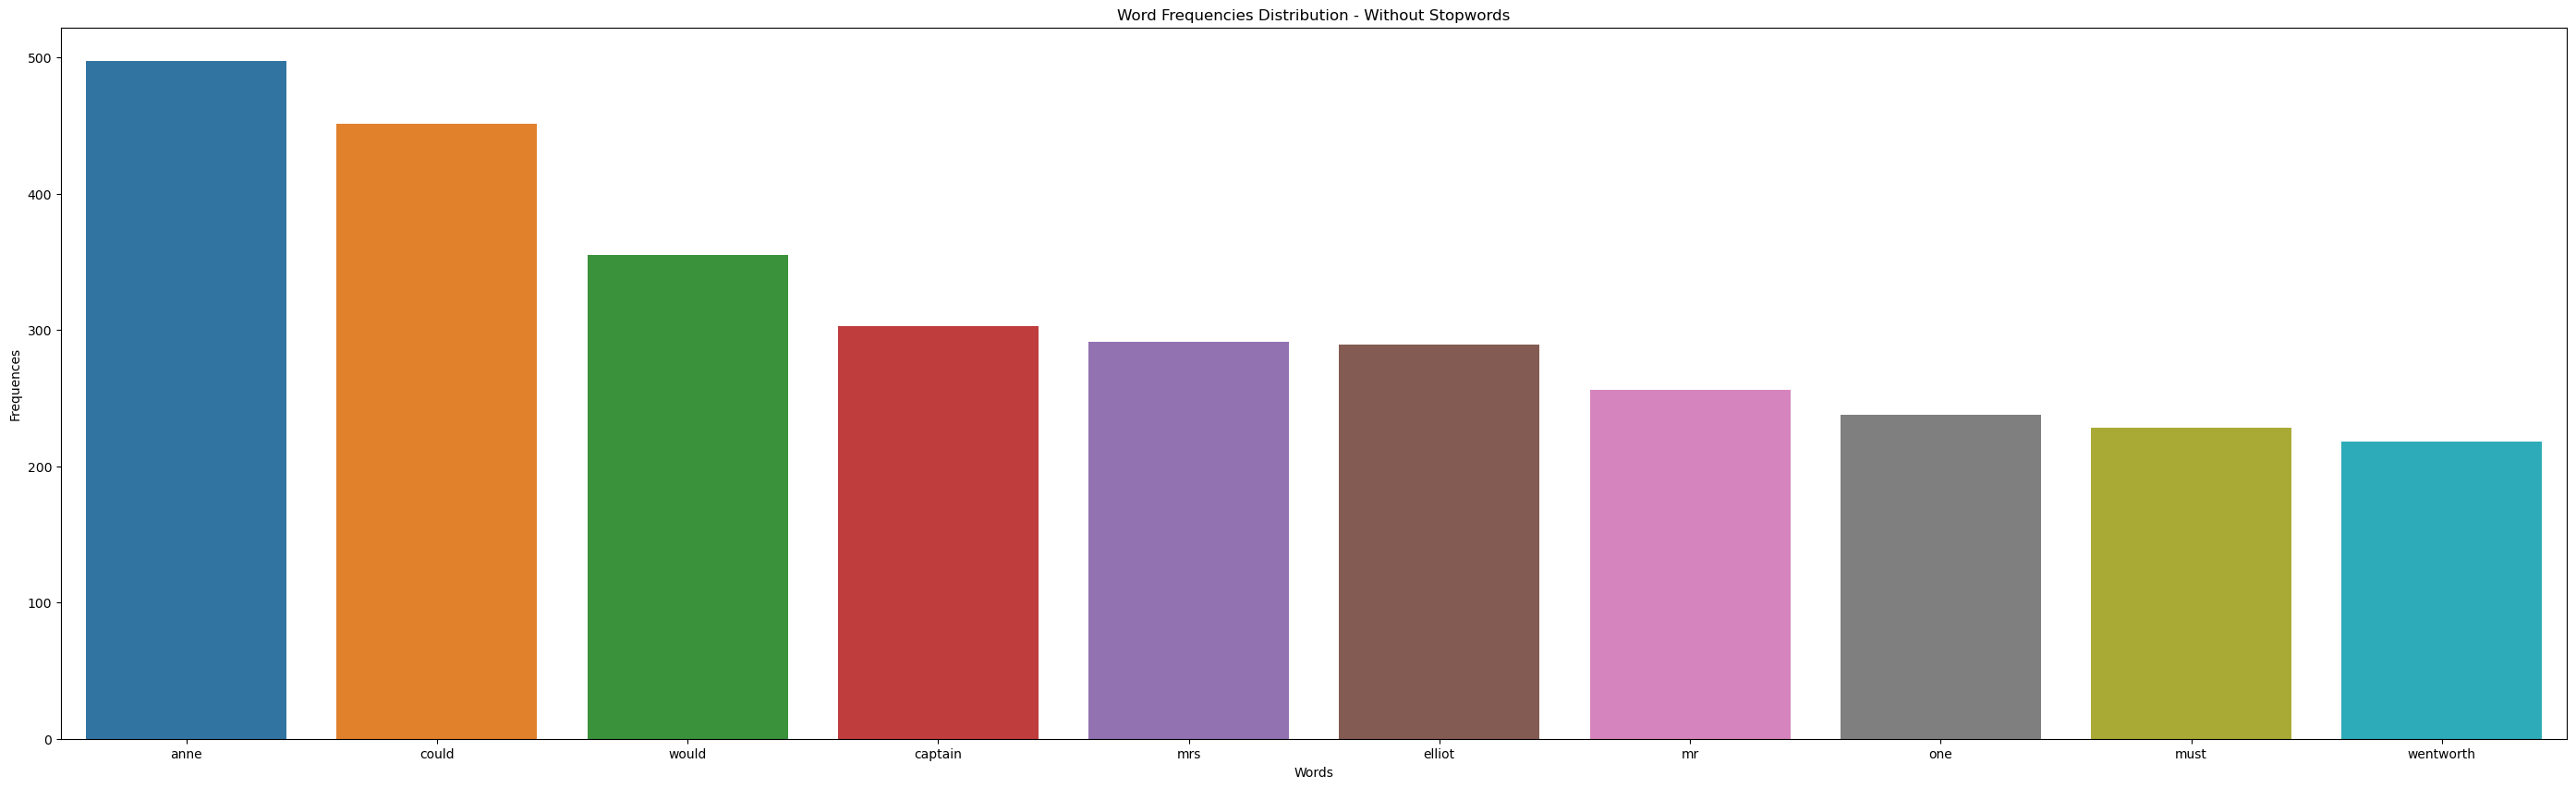

In [5]:
Stopwords = stopwords.words('english')
fd_no_stopwords = FreqDist()

for word in words_corpus:
  if word.lower() not in Punctuation and word.lower() not in Stopwords:
    fd_no_stopwords[word.lower()]+=1

words = [element[0] for element in fd_no_stopwords.most_common(10)]
frequences = [element[1] for element in fd_no_stopwords.most_common(10)]
plt.figure(figsize=(35,10))
plt.xlabel("Words")
plt.ylabel("Frequences")
plt.title("Word Frequencies Distribution - Without Stopwords")
plot = sns.barplot(x=words,y=frequences)

### **Zipf's Law**

In a linguistic corpus, the Zipf's Law is a statistical distribution about the frequency of words.
In this law we have that the frequency of a given word is dependent on the inverse of it's rank. 
The rank of a word can be defined on the basis of the frequency of that word in the corpus, then in general we have that the words with the highest frequency have lower rank.
We can see this distribution as a logarithmic curve, in which at the beginning until certain point we have the stopwords.
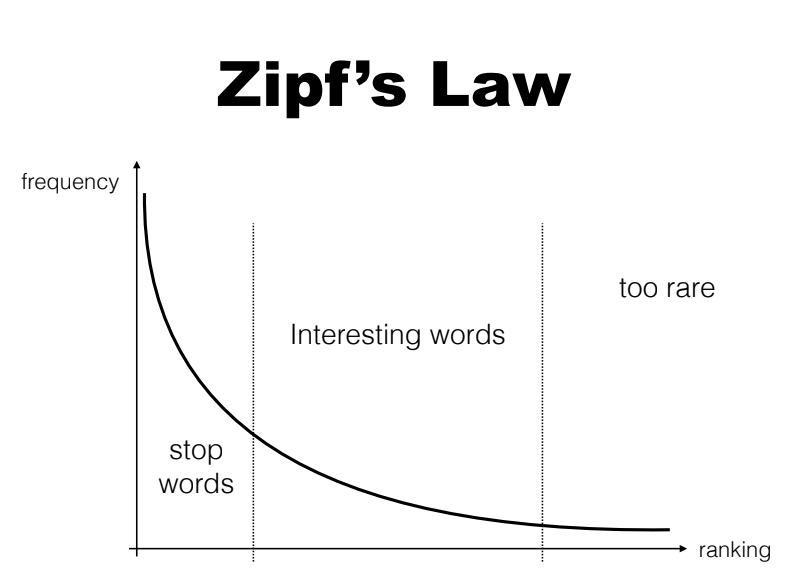


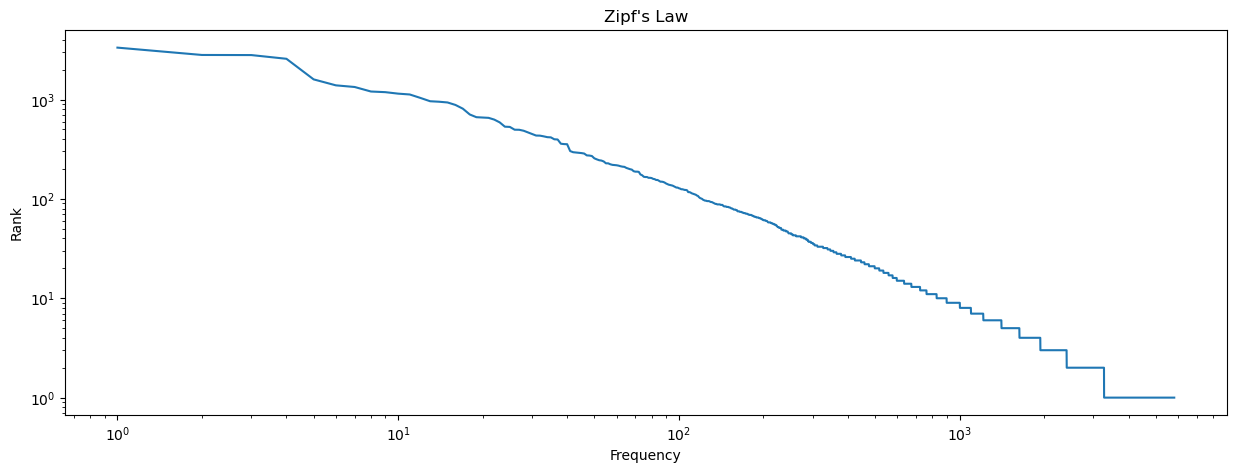

In [6]:
ranks = []
freqs = []
rank = 0
for element in fd.most_common(fd.B()):
  rank = rank + 1
  ranks.append(rank)
  freqs.append(element[1])

plt.figure(figsize=(15,5))
plt.loglog(ranks,freqs)
plt.title("Zipf's Law")
plt.xlabel("Frequency")
plt.ylabel("Rank")
plt.show()

## **Tokenization**
Tokenization means separating out (tokenizing) words from running text.<br>
To tokenize the corpus it is possible to use the NLTK's built-in function `words_tokenize(s)`, where `s` is the string that represents the corpus.



```
# OUTPUT of the first 20 words
            Token
0               [
1      Persuasion
2              by
3            Jane
4          Austen
5            1818
6               ]
7         Chapter
8               1
9             Sir
10         Walter
11         Elliot
12              ,
13             of
14       Kellynch
15           Hall
16              ,
17             in
18  Somersetshire
19              ,
```



In [7]:
df = pd.DataFrame(word_tokenize(corpus)[:20], columns=["Token"]) #word_tokenize consider also the punctuation
display(df)


,Token
0,[
1,Persuasion
2,by
3,Jane
4,Austen
5,1818
6,]
7,Chapter
8,1
9,Sir


## **Lemmatization**
Lemmatization means determining that two words have the same root, despite their surface differences.<br>
To do the lemmatization, we use **wordnet lemmatizer** of nltk, based on the **WordNet** system.<br> 
For finding the lemma of given word we use the method ``` lemmatize``` where the input is formed by:

*   Word
*   Tag associaded to that word, we compute the tag through the build in method of nltk

### **WordNet**
WordNet is a lexical database of semantic relations between words.WordNet links words into semantic relations including synonyms, hyponyms, and meronyms.

```
# FOR EXAMPLE
are, is, am -> be
```



In [8]:
#This dictionary is used for the mapping between the postags of the ntlk function and the postags of the wordnet .
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}

#Object of the class WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Define a tokenizer in order to tokenize our corpus without considering the punctuation
tokenizer = RegexpTokenizer(r'\w+')
corpus_tokenized = tokenizer.tokenize(corpus)
lemma = []
words = []
# Only for testing we consider the range [100-130]
for token in corpus_tokenized[100:130]:
  words.append(token.lower())
  #For computing the tag given a word we use the built-in function of nltk.
  tag_token = nltk.pos_tag([token])[0][1][0].upper() 
  #We compute the lemma with the object lemmatizer where in input we have the word and the tag associated.
  lemma.append(lemmatizer.lemmatize(token.lower(),tag_dict.get(tag_token,wordnet.NOUN))) 

#We construct a list of tuples.
data = list(zip(words,lemma)) 

df_lemma_stems = pd.DataFrame(data,columns=["Word","Lemma"])

display(df_lemma_stems)
  




,Word,Lemma
0,his,his
1,own,own
2,history,history
3,with,with
4,an,an
5,interest,interest
6,which,which
7,never,never
8,failed,fail
9,this,this


## **Stemming**
Stemming refers to the process of slicing a word with the intention of
removing affixes. <br>
To do the stemming we use the porter algorithm already present in NLTK. Once the PorterStemmer object is instantiated, for each word of the corpus the `PorterStemmer.stem(word)` method is used, where `word` is the word for which the stem is to be obtained.



```
# OUTPUT of the first 20 words
         Word      Lemma      Stem
0         his        his        hi
1         own        own       own
2     history    history   histori
3        with       with      with
4          an         an        an
5    interest   interest  interest
6       which      which     which
7       never      never     never
8      failed       fail      fail
9        this       this       thi
10        was         be        wa
11        the        the       the
12       page       page      page
13         at         at        at
14      which      which     which
15        the        the       the
16  favourite  favourite  favourit
17     volume     volume     volum
18     always     always     alway
19     opened       open      open
20     elliot     elliot    elliot
21         of         of        of
22   kellynch   kellynch  kellynch
23       hall       hall      hall
24     walter     walter    walter
25     elliot     elliot    elliot
26       born       born      born
27      march      march     march
28          1          1         1
29       1760       1760      1760
```



In [9]:
porter_stemmer  = PorterStemmer()
stems = []
#Only for testing we consider the range [100:130]
for token in corpus_tokenized[100:130]:
  stems.append(porter_stemmer.stem(token.lower()))

df_lemma_stems["Stem"] = stems

display(df_lemma_stems)

,Word,Lemma,Stem
0,his,his,hi
1,own,own,own
2,history,history,histori
3,with,with,with
4,an,an,an
5,interest,interest,interest
6,which,which,which
7,never,never,never
8,failed,fail,fail
9,this,this,thi
